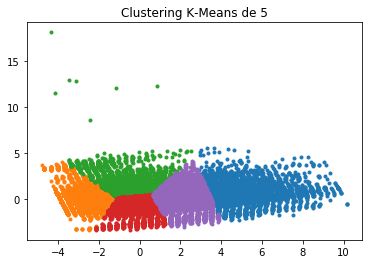

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import sklearn

# Normalizador de información mutua
from sklearn.metrics import normalized_mutual_info_score as NMI
# Normalizador
from sklearn.preprocessing import StandardScaler as SS
# Dimensionador
from sklearn.decomposition import PCA 
# Gestionador KMeans 
from sklearn.cluster import KMeans

# Parametros
CSV_PATH = 'datos_prueba/prueba100.000.csv'
CLUSTERS = 5
MAX_IT = 10

# Se obtienen los datos del archivo
dataset = pd.read_csv(CSV_PATH)

# Se filtra el dataset por valores numéricos sin contar brewery_time e identificadores
data = pd.DataFrame({'review_overall':    dataset['review_overall'],
                     'review_aroma':      dataset['review_aroma'],
                     'review_appearance': dataset['review_appearance'],
                     'review_palate':     dataset['review_palate'],
                     'review_taste':      dataset['review_taste'],
                     'beer_abv':          dataset['beer_abv']})

# Se arregla el dataset asumiendo 0 == vacio - Error: NaN found
data = data.fillna(0)

# Se normalizan los datos y se disminuye la dimención
data = SS().fit_transform(data)
data = PCA(n_components = 2).fit_transform(data)

# Inicialización de K-Means
k_means = KMeans(init='k-means++', n_clusters=CLUSTERS, n_init=MAX_IT)
k_means.fit(data)

# Asignación de labels
labels = k_means.labels_


for label in np.unique(labels):
    plt.plot(data[labels == label, 0], data[labels == label, 1], '.')

plt.title('Clustering K-Means de ' + str(CLUSTERS))
plt.show()